# Analyse des Données   

In [32]:
# importations des packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


    


In [33]:
# Importation des données 
df = pd.read_csv ("Time-Wasters on Social Media.csv", index_col= "UserID" )
df.head(10)

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
UserID,,,,,,,,,,,,,,,,,,,,,
1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,89,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
7,56,Male,India,46201,False,False,Students,Rural,TikTok,247,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,191,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,34,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data


In [34]:
# Affichage des informations sur les variables :
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   bool  
 5   Owns Property             1000 non-null   bool  
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video ID                  1000 non-null   int64 
 12  Video Category            1000 non-null   object
 13  Video Length              1000 non-null   int64 
 14  Engagement                100

In [35]:
df.describe()

,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [36]:
# information sur les valeurs manquantes :
df.isna().sum() #aucune valeurs manquantes !

Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [37]:
df.columns

Index(['Age', 'Gender', 'Location', 'Income', 'Debt', 'Owns Property',
       'Profession', 'Demographics', 'Platform', 'Total Time Spent',
       'Number of Sessions', 'Video ID', 'Video Category', 'Video Length',
       'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

In [38]:
df["Age"].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63], dtype=int64)

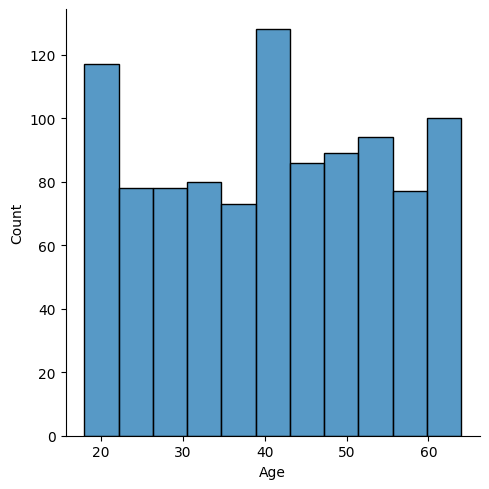

In [39]:

sns.displot(df["Age"])

<Axes: ylabel='Age'>

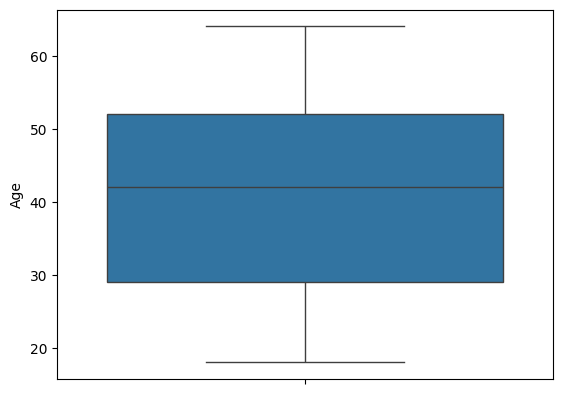

In [40]:
sns.boxplot(df["Age"])

<Axes: ylabel='Gender'>

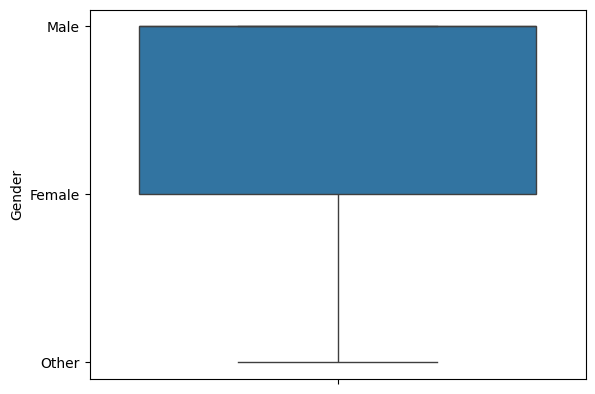

In [41]:
sns.boxplot (df["Gender"])

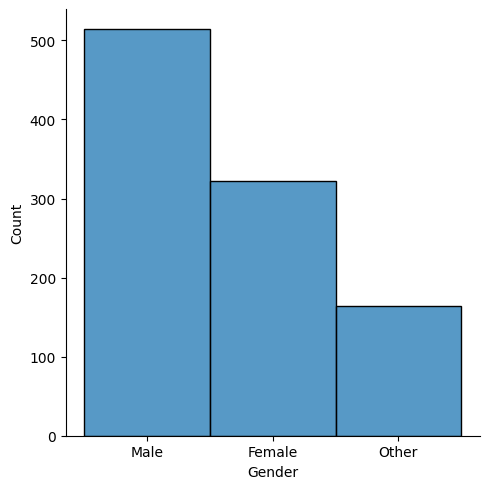

In [42]:
sns.displot(df["Gender"])

In [43]:
df["Location"].unique()


array(['Pakistan', 'Mexico', 'United States', 'Barzil', 'Vietnam',
       'India', 'Indonesia', 'Philippines', 'Japan', 'Germany'],
      dtype=object)

<Figure size 2000x2000 with 0 Axes>

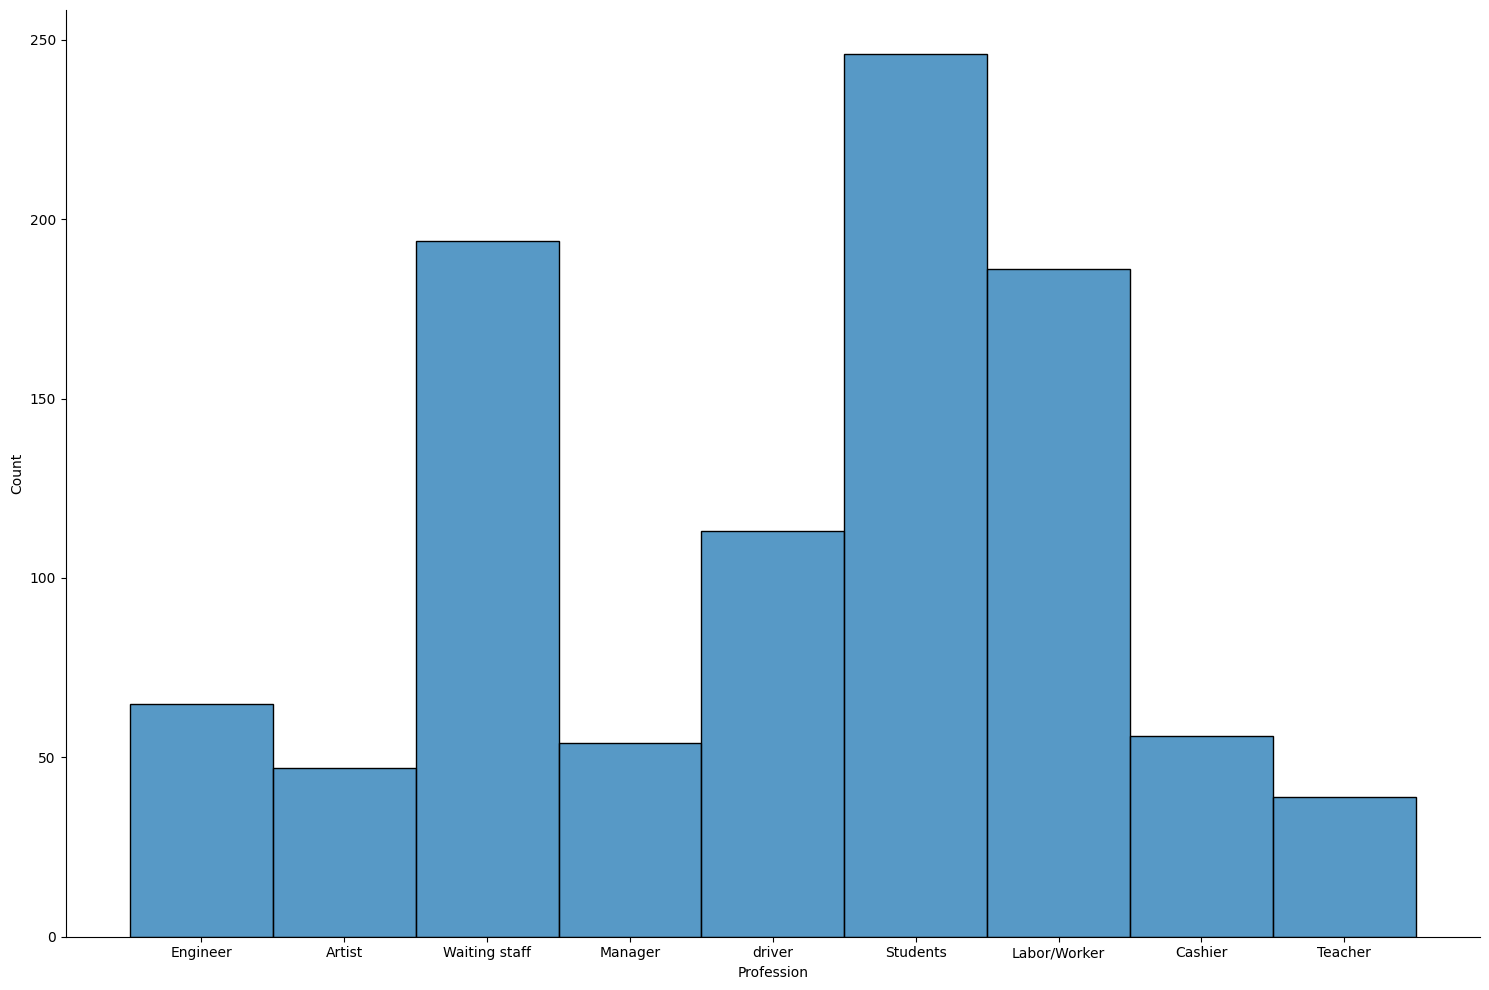

In [44]:
plt.figure(figsize=(20, 20))
sns.displot(df["Profession"], height=10, aspect=1.5)


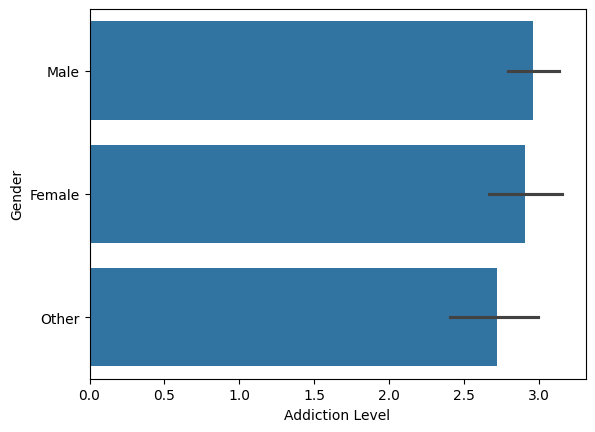

In [45]:
sns.barplot(data = df, x= "Addiction Level", y= "Gender"); 

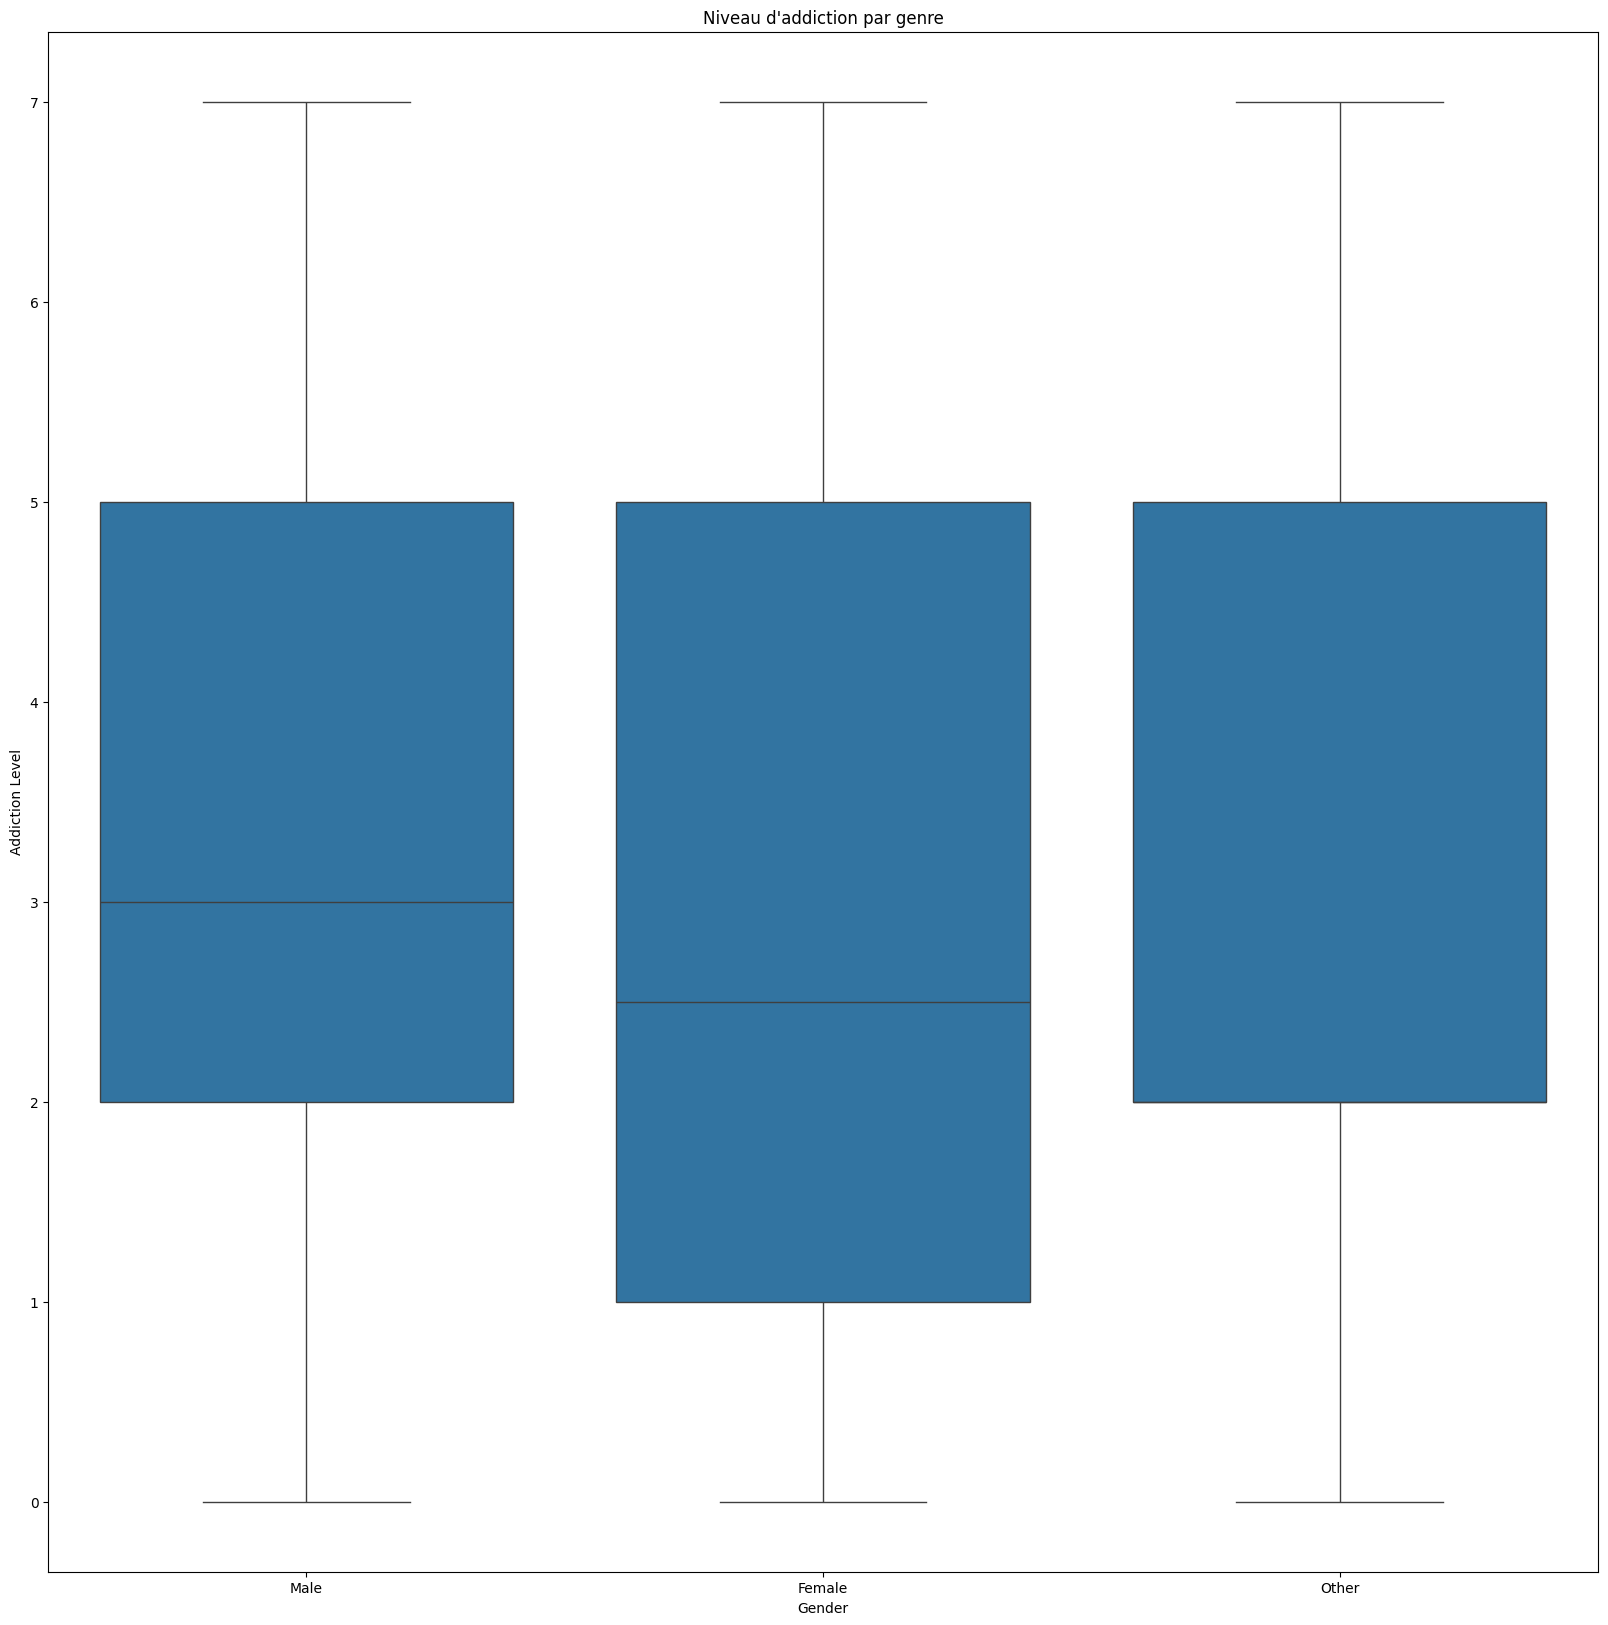

In [46]:
plt.figure (figsize = (20,20))
sns.boxplot(data=df, y ="Addiction Level", x="Gender")
plt.title ("Niveau d'addiction par genre");

Text(0.5, 1.0, 'Temps passé sur la vidéo par âge et genre')

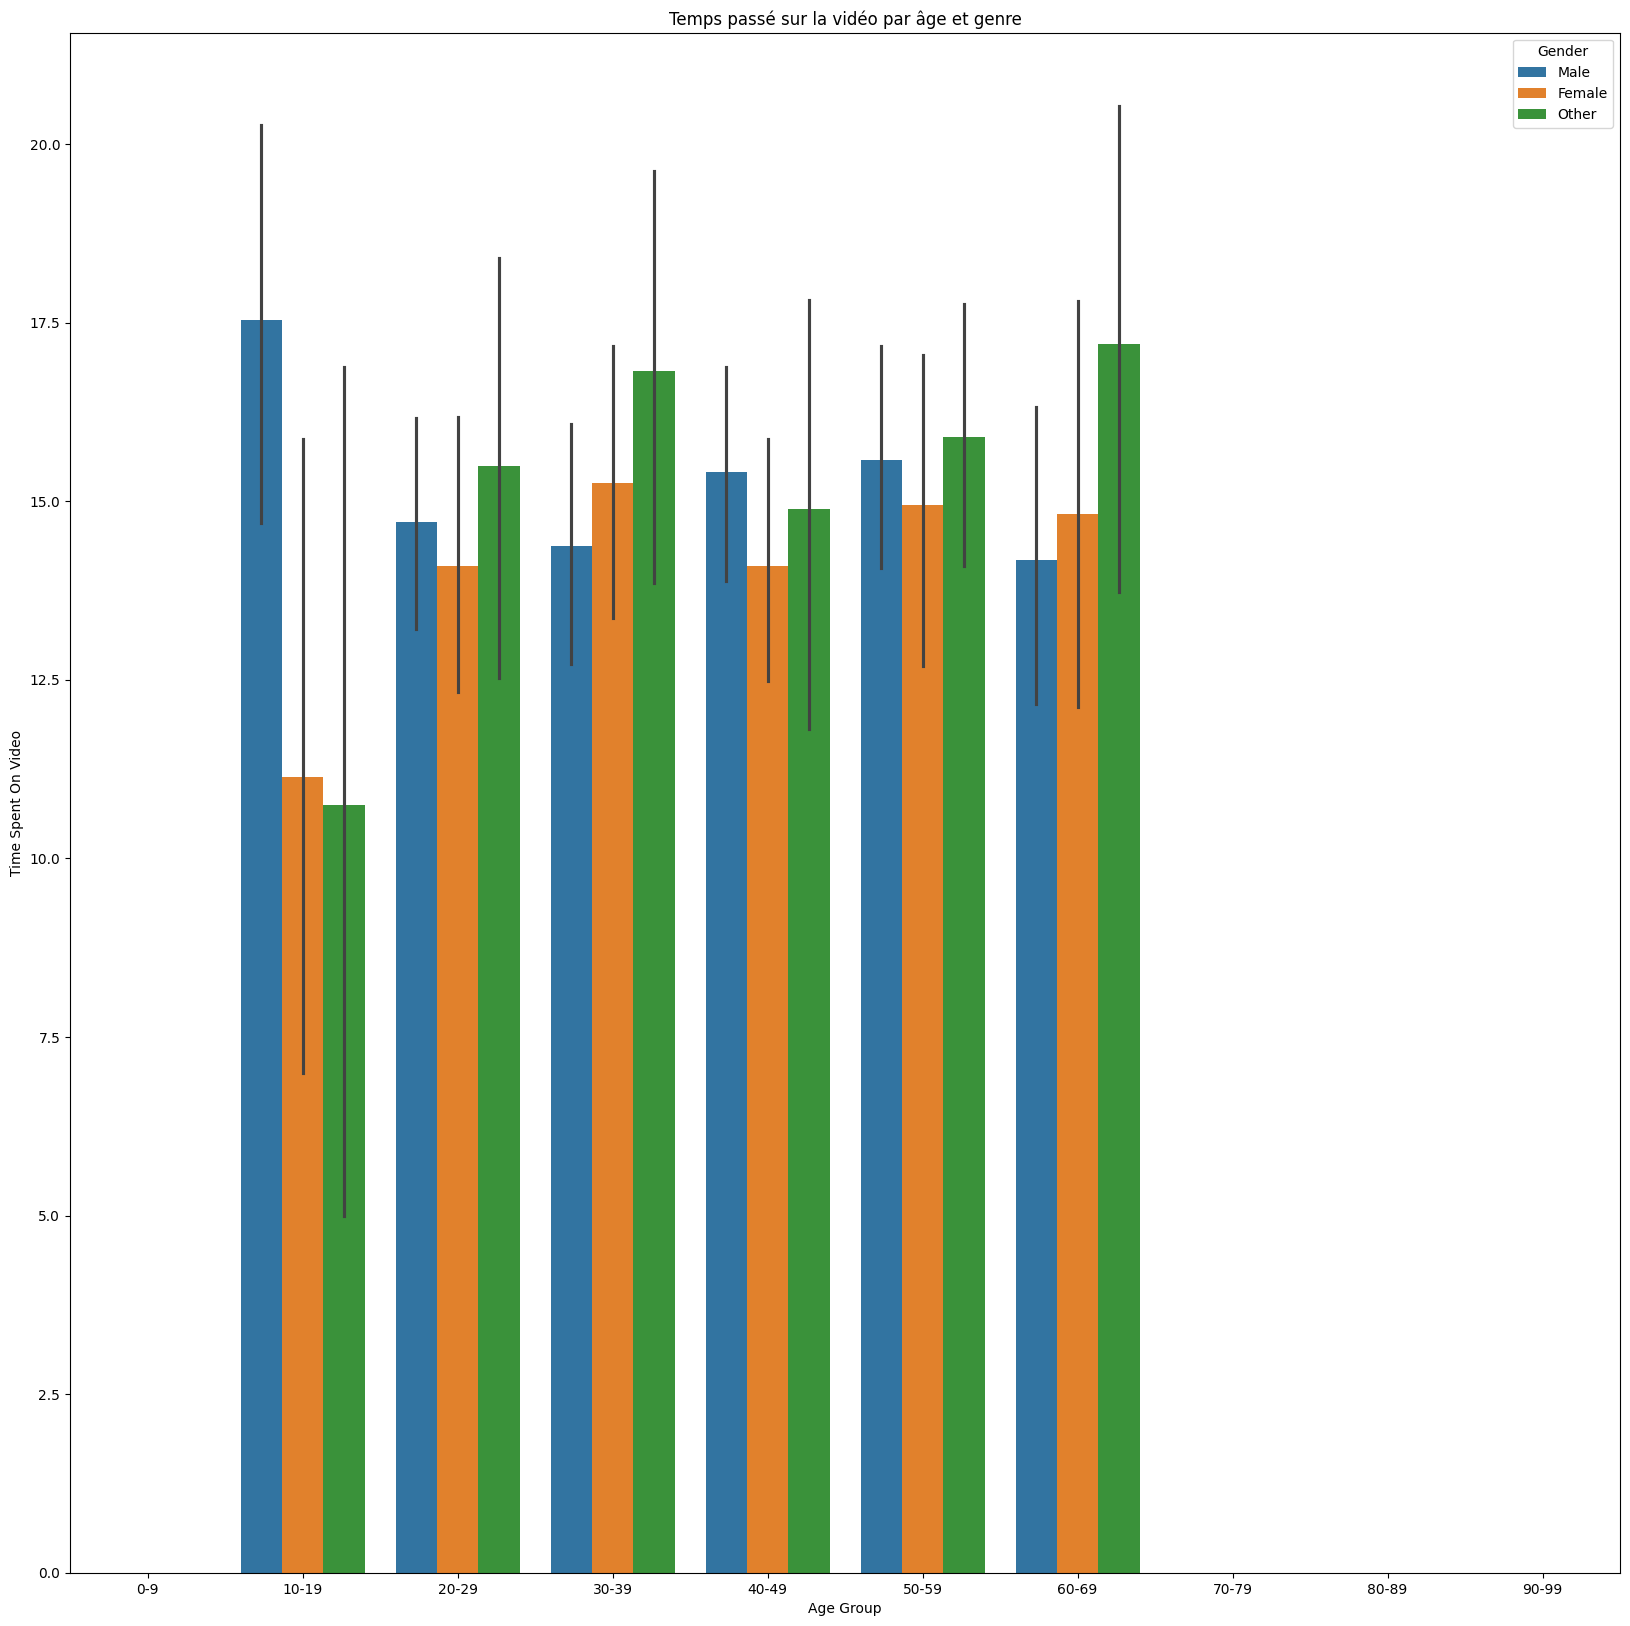

In [47]:
# Création des tranches d'âge par intervalles de 10 ans
df['Age Group'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Affichage du graphique
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x="Age Group", y="Time Spent On Video", hue="Gender")


plt.title("Temps passé sur la vidéo par âge et genre")



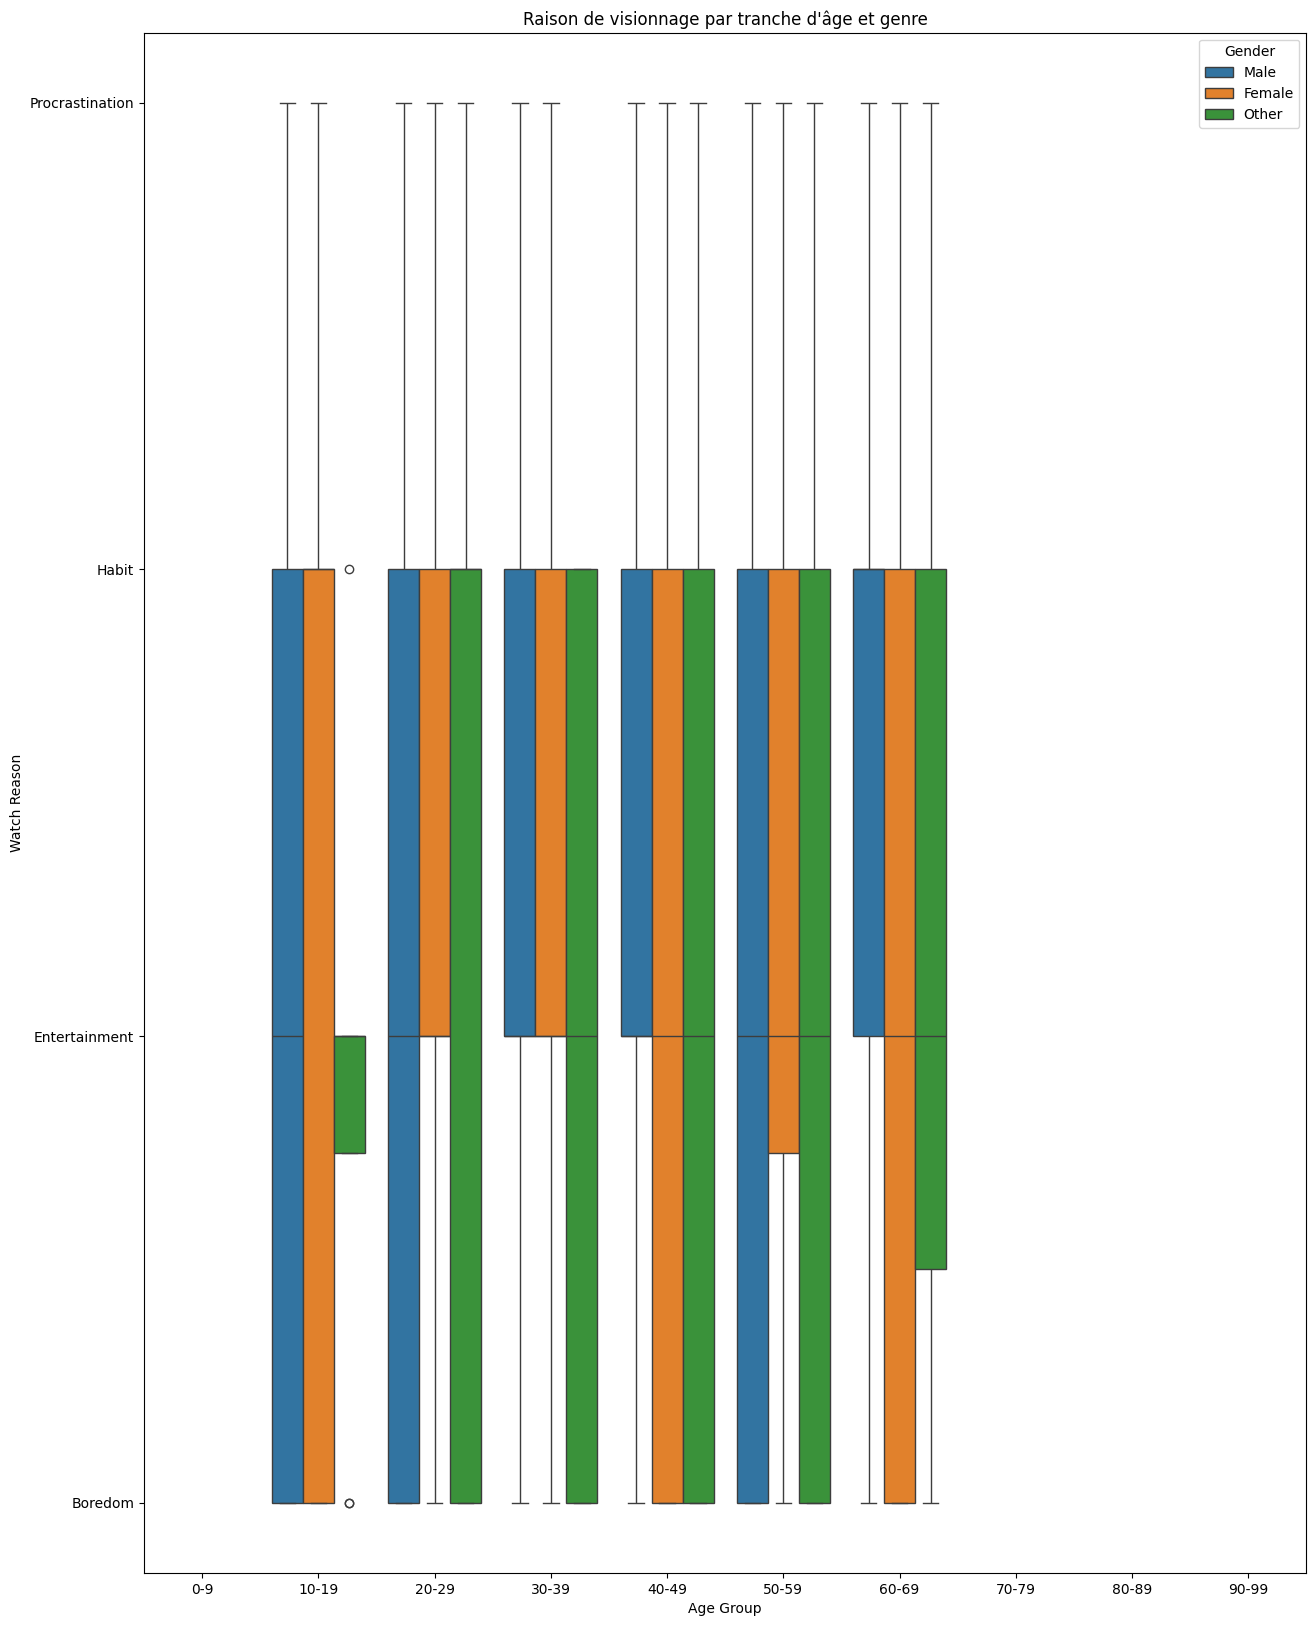

In [48]:
# Watch Reason
plt.figure(figsize=(15, 20))
sns.boxplot(data=df, x="Age Group", y="Watch Reason", hue="Gender",)


plt.title("Raison de visionnage par tranche d'âge et genre")

plt.show()


<Figure size 1500x2000 with 0 Axes>

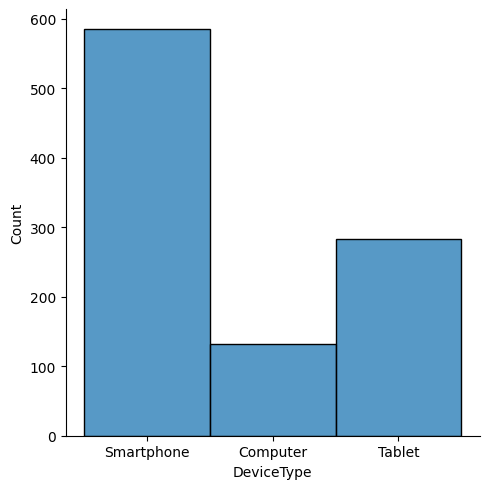

In [49]:
# DeviceType
plt.figure (figsize = (15,20))
sns.displot(data=df, x= "DeviceType") ;

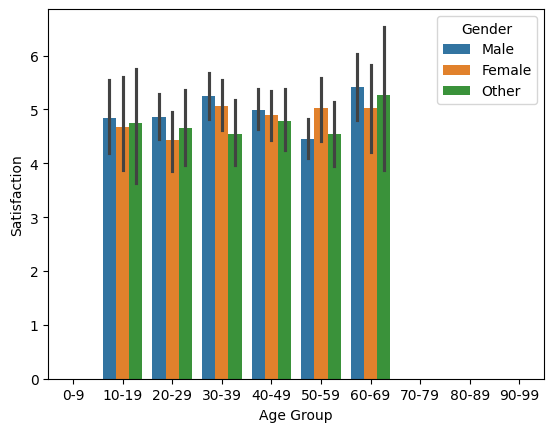

In [50]:
# Satisfaction
sns.barplot (df, x= "Age Group",y= "Satisfaction", hue= "Gender");

<Axes: xlabel='Satisfaction', ylabel='Video Category'>

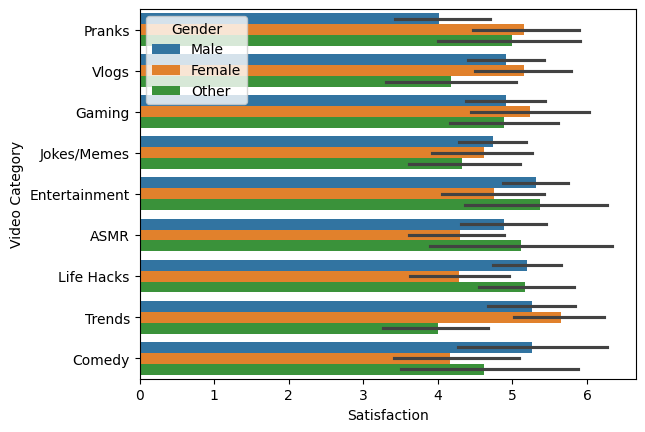

In [51]:
# Video Category
sns.barplot(df, x= "Satisfaction",y= "Video Category", hue ="Gender")

<Axes: xlabel='Location', ylabel='Addiction Level'>

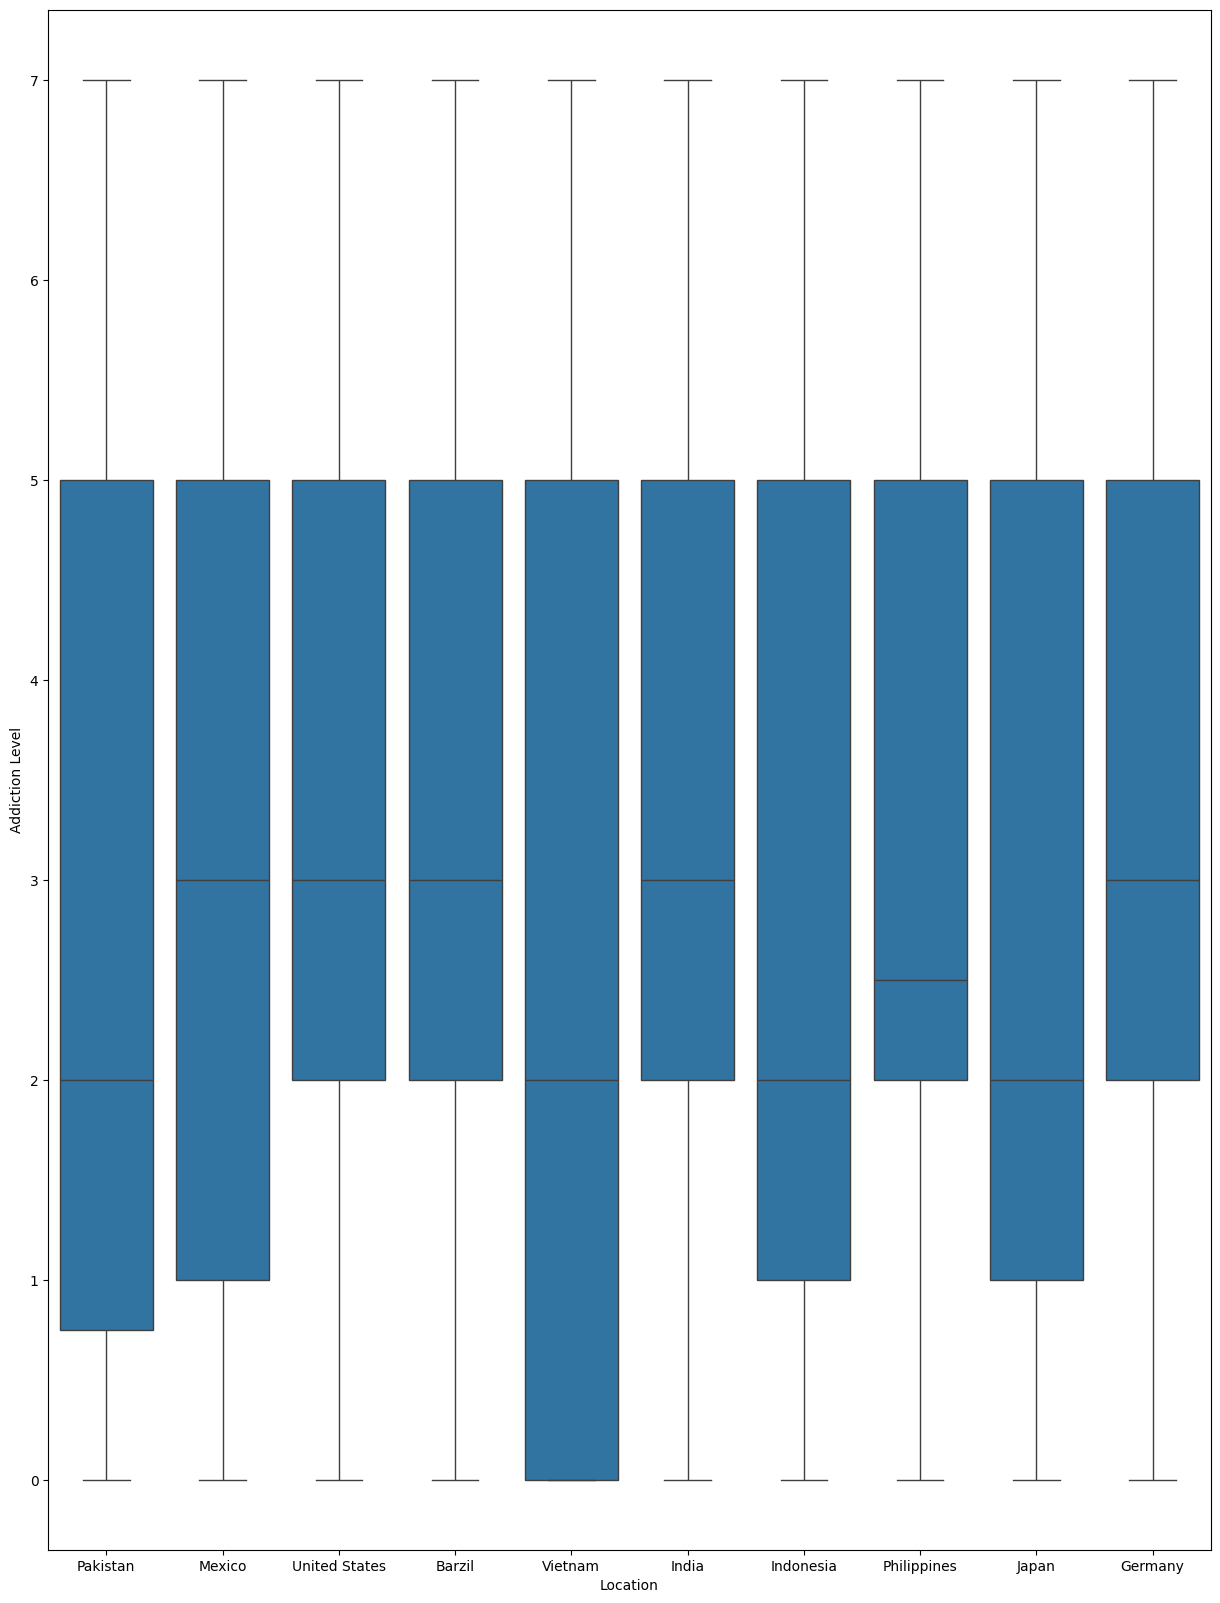

In [52]:
# Location
plt.figure (figsize= (15,20))
sns.boxplot (df, x= "Location", y= "Addiction Level")

In [53]:
# Self Control

<Figure size 2000x2000 with 0 Axes>

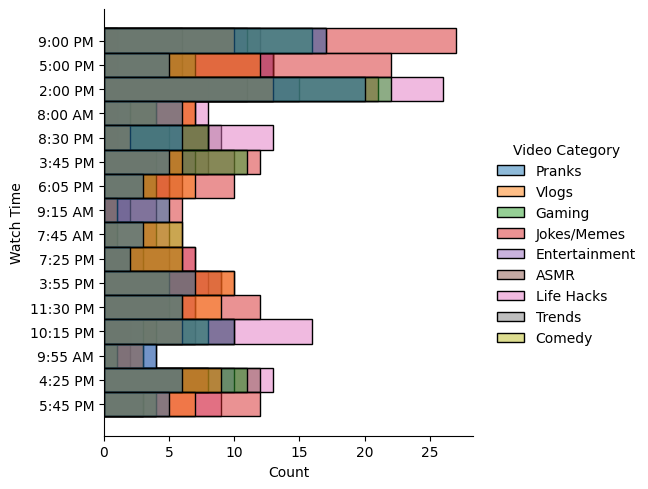

In [54]:
# 
plt.figure(figsize=(20,20))
sns.displot (df, y="Watch Time", hue = "Video Category")

<Axes: xlabel='Gender', ylabel='Video Category'>

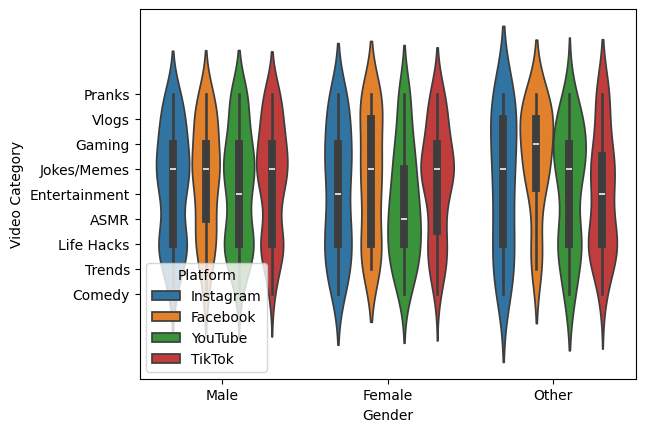

In [55]:
# Platforme et Catégorie de Védio 
sns.violinplot(data= df, hue = "Platform", x= "Gender", 
            y = "Video Category")

In [56]:
df["Scroll Rate"].unique()

array([87, 46, 88, 93,  4, 38, 63, 29, 19, 91, 35, 70, 23, 44, 48, 52,  8,
       55, 66, 77, 40, 85, 31, 61, 36, 13, 37, 47, 90, 71, 22, 39, 58, 30,
       18, 74, 94, 26,  7, 69, 65, 25, 32, 17, 79, 84, 15, 99,  6, 95, 45,
       82, 24, 14, 92, 75, 62, 89,  1, 33, 56, 98, 21, 20, 16, 67, 49, 59,
       97, 81, 41, 68,  9, 34, 64, 60,  3, 10, 51, 76, 86, 12, 53, 42, 78,
       43,  5, 96, 27, 11, 73, 72, 28, 50,  2, 54, 83, 57, 80],
      dtype=int64)

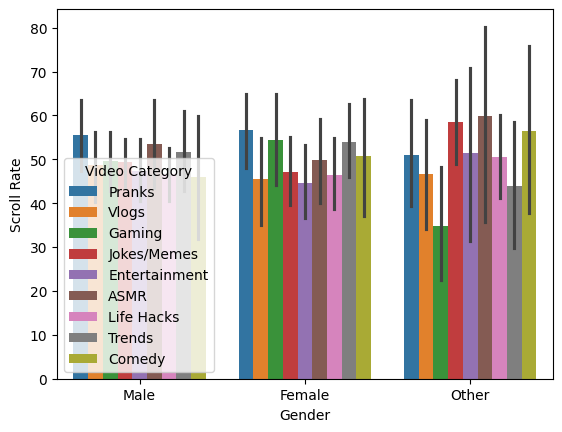

In [57]:
# Scroll Rate et Gender et Video 
sns.barplot(df, x = "Gender", y = "Scroll Rate", hue = "Video Category"); 


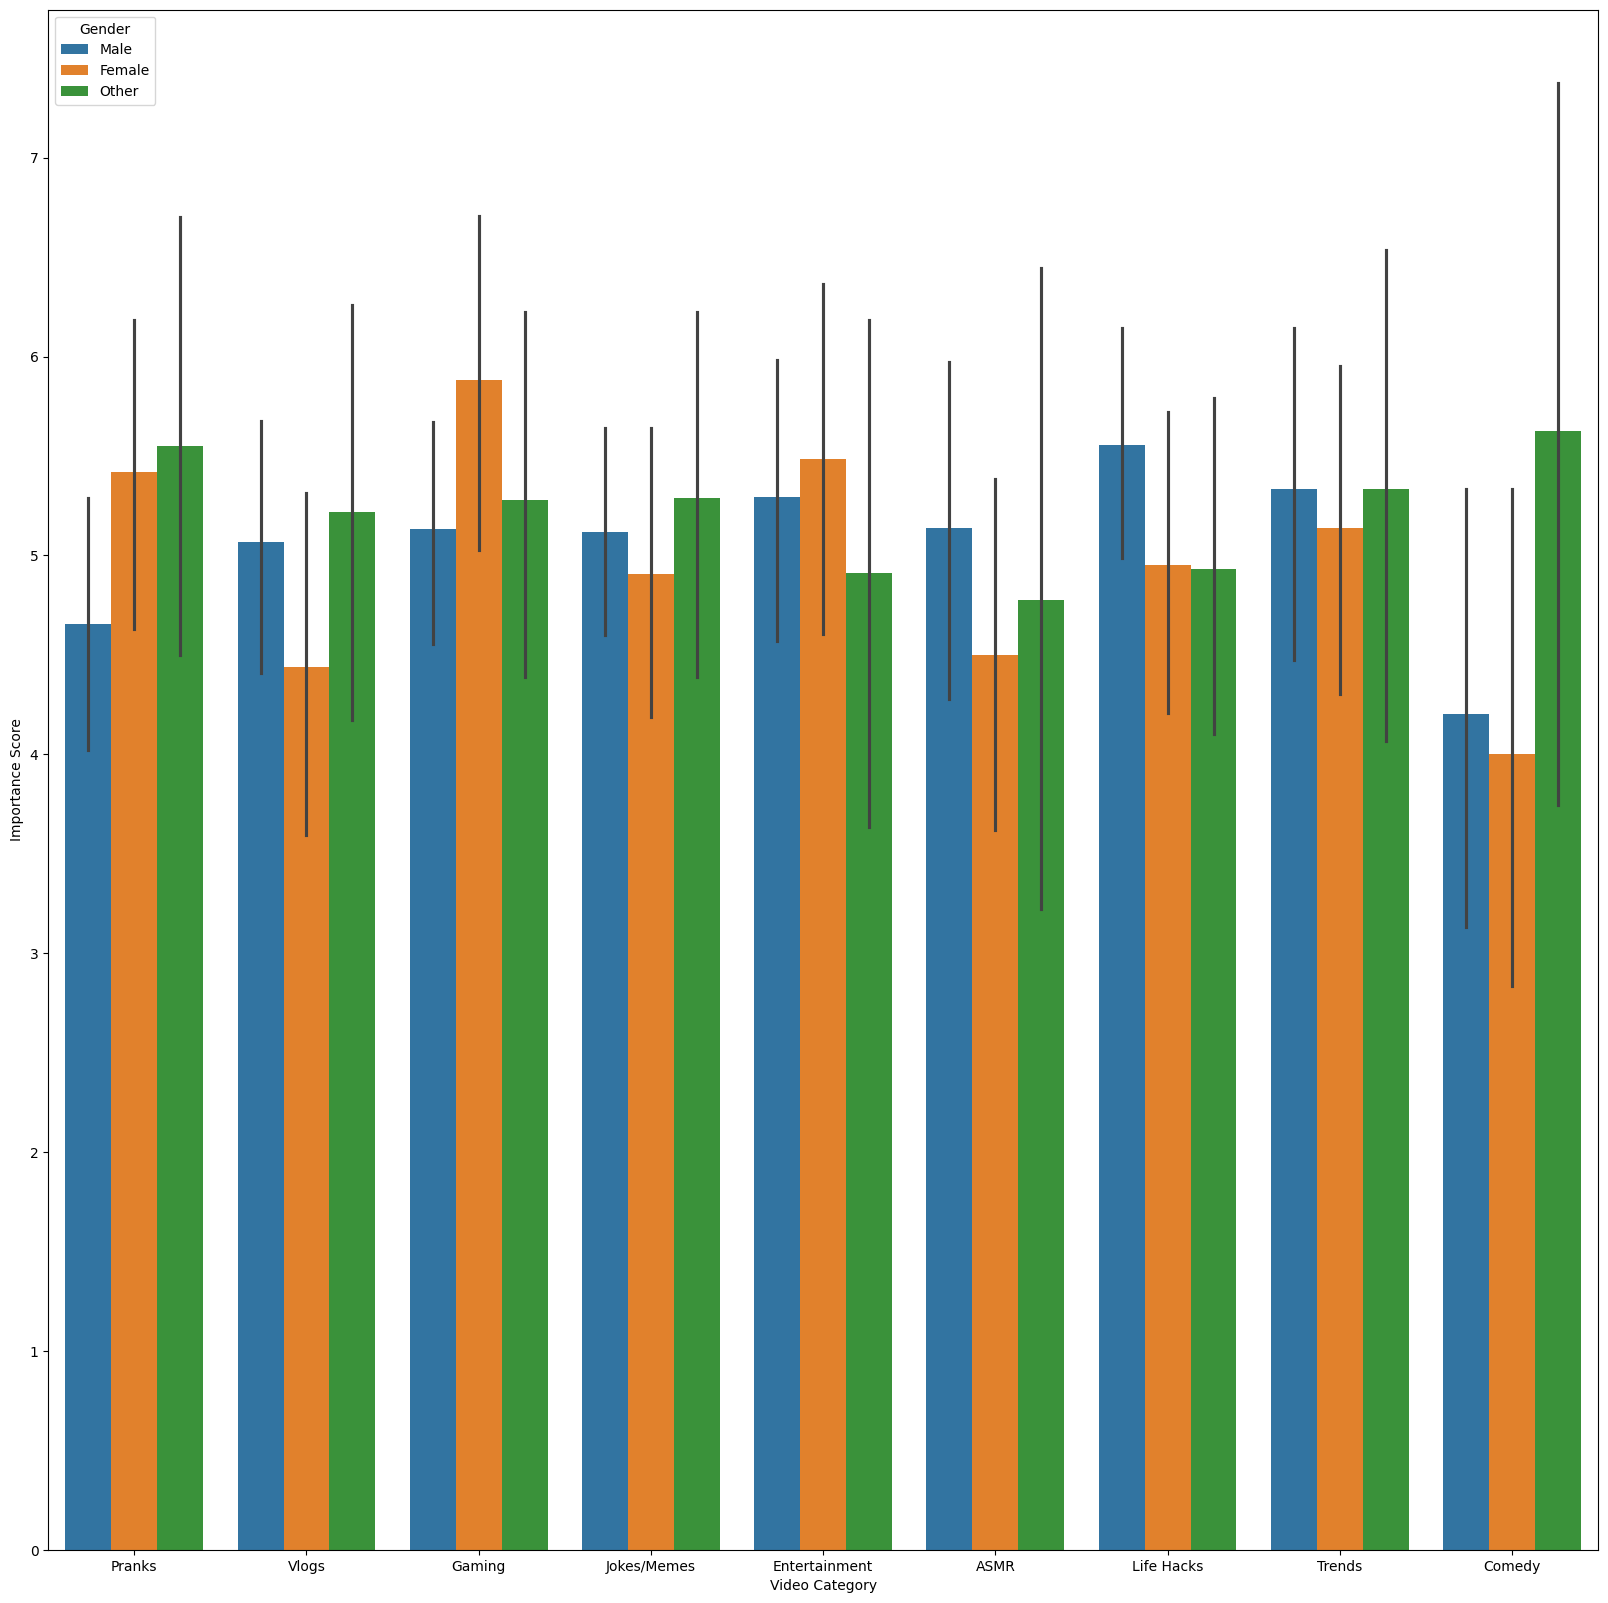

In [58]:
# Importance Score, 
plt.figure (figsize = (20, 20))
sns.barplot ( x= "Video Category", y= "Importance Score", hue= "Gender", data = df) ;

### Encodage des variables categorielles : 
  

- Les variables a sont  :
* Gender (object)
* Location (object)
* Profession (object)
* Demographics (object)
* Platform (object)
* Video Category (object)
* Frequency (object)
* Watch Reason (object)
* DeviceType (object)
* OS (object)
* Watch Time (object)
* CurrentActivity (object)
* ConnectionType (object)
* Debt (bool)
* Owns Property (bool)

1) Encodage binaire pour les variables booléennes :

In [59]:
# Encoder les colonnes booléennes en valeurs numériques
df['Debt'] = df['Debt'].astype(int)  # Convertit True/False en 1/0
df['Owns Property'] = df['Owns Property'].astype(int)  # Convertit True/False en 1/0


2) Encodage des variables non ordonnées :

In [60]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialiser OneHotEncoder avec sparse_output
encoder = OneHotEncoder(sparse_output=False)

# Liste des colonnes à encoder avec One-Hot Encoding
non_ordinal_columns = ['Gender', 'Location', 'Profession', 'Demographics', 
                       'Platform', 'Video Category', 'Frequency', 
                       'Watch Reason', 'DeviceType', 'OS', 
                       'CurrentActivity', 'ConnectionType']

# Appliquer One-Hot Encoding
df_encoded = pd.DataFrame(encoder.fit_transform(df[non_ordinal_columns]), 
                           columns=encoder.get_feature_names_out(non_ordinal_columns))

# Ajouter les colonnes encodées au DataFrame original
df = pd.concat([df.drop(columns=non_ordinal_columns), df_encoded], axis=1)

# Encoder la colonne ordinale Age Group
age_group_mapping = {
    '10-19': 1,
    '20-29': 2,
    '30-39': 3,
    '40-49': 4,
    '50-59': 5,
    '60-69': 6
}

df['Age Group'] = df['Age Group'].map(age_group_mapping)


In [61]:
df["Watch Time"].unique()

array(['9:00 PM', '5:00 PM', '2:00 PM', '8:00 AM', '8:30 PM', '3:45 PM',
       '6:05 PM', '9:15 AM', '7:45 AM', '7:25 PM', '3:55 PM', '11:30 PM',
       '10:15 PM', '9:55 AM', '4:25 PM', '5:45 PM', nan], dtype=object)

 La variable : watch_time 

In [62]:
def convert_watch_time(watch_time):
    if isinstance(watch_time, str):  # Vérifiez que c'est une chaîne
        if 'AM' in watch_time:
            time = watch_time.replace(' AM', '')
            h, m = map(int, time.split(':'))
        else:
            time = watch_time.replace(' PM', '')
            h, m = map(int, time.split(':'))
            h += 12  # Ajoute 12 heures pour les PM
        return h * 60 + m
    return watch_time  # Retourne NaN ou d'autres valeurs non traitables

# Appliquer la conversion à la colonne "Watch Time"
df['Watch Time'] = df['Watch Time'].apply(convert_watch_time)

# Vérifiez les valeurs uniques après la conversion
print(df["Watch Time"].unique())


[1260. 1020.  840.  480. 1230.  945. 1085.  555.  465. 1165.  955. 1410.
 1335.  595.  985. 1065.   nan]


In [63]:


df



,Age,Income,Debt,Owns Property,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,...,OS_Android,OS_MacOS,OS_Windows,OS_iOS,CurrentActivity_At home,CurrentActivity_At school,CurrentActivity_At work,CurrentActivity_Commuting,ConnectionType_Mobile Data,ConnectionType_Wi-Fi
1,56.0,82812.0,1.0,1.0,80.0,17.0,4229.0,24.0,7867.0,5.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,46.0,27999.0,0.0,1.0,228.0,14.0,2131.0,19.0,5944.0,6.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,32.0,42436.0,0.0,1.0,30.0,6.0,4367.0,19.0,8674.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,60.0,62963.0,1.0,0.0,101.0,19.0,1507.0,4.0,2477.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,25.0,22096.0,0.0,1.0,136.0,6.0,2159.0,19.0,3093.0,7.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,40.0,27006.0,0.0,0.0,231.0,15.0,2794.0,2.0,1803.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
998,27.0,94218.0,1.0,1.0,165.0,1.0,2893.0,12.0,9290.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
999,61.0,85344.0,1.0,0.0,151.0,11.0,1199.0,15.0,2050.0,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000,19.0,53840.0,1.0,1.0,167.0,17.0,8012.0,4.0,9790.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Séparation de jeux de données en jeu d'entrainement et jeu de test

In [64]:
### Séparation du jeux de données en jeu d'entrainement et jeu de test

from sklearn.model_selection import train_test_split

# Définir les features et la variable cible
X = df.drop(columns=['Addiction Level'])
y = df['Addiction Level']

# Séparer le dataset en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la forme des ensembles
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (800, 76)
X_test shape: (201, 76)
y_train shape: (800,)
y_test shape: (201,)


# Modélisation 

# 1. Modèle de régression Linière 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Entraîner le modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calcul des métriques
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Affichage des résultats
print(f"Train R²: {r2_train:.2f}, MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Test R²: {r2_test:.2f}, MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")

# Graphique des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Régression Linéaire: Prédictions vs Valeurs Réelles')
plt.show()


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Graphique
plt.scatter(y_test, y_test_pred)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire: Prédictions vs Réelles")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
